# Create house price prediction model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Fumctiom to find unique values
def uniqueValues(column, cleaned_dataset):
    if column in cleaned_dataset.columns:
        missing_count = cleaned_dataset[column].unique()
        print(f"Number of unique values in '{column}': {missing_count}")
    else:
        print(f"Column '{column}' not found in the dataset.")


df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## It is clearly a typical supervised learning task, we have labeled training samples (each instance comes with the expected output - median housing price). It is also typical regression task as aim is to predict value. More specifically it is multiple regression problem, since model uses multiple features to make a prediction.

In [39]:
uniqueValues('MiscFeature', df)
uniqueValues('MSSubClass', df)

uniqueValues('PoolArea', df)

uniqueValues('RoofStyle', df)
uniqueValues('RoofMatl', df)
uniqueValues('ExterQual', df)
uniqueValues('ExterCond', df)
uniqueValues('OverallQual', df)
uniqueValues('OverallCond', df)
uniqueValues('HouseStyle', df)
uniqueValues('Condition1', df)
uniqueValues('Condition2', df)
uniqueValues('BldgType',df)
uniqueValues('LotConfig', df)
uniqueValues('Utilities', df)
uniqueValues('LotShape',df)
uniqueValues('MSZoning', df)
uniqueValues('Street', df)
uniqueValues('Alley', df)

Number of unique values in 'MiscFeature': [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Number of unique values in 'MSSubClass': [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Number of unique values in 'PoolArea': [  0 512 648 576 555 480 519 738]
Number of unique values in 'RoofStyle': ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
Number of unique values in 'RoofMatl': ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Number of unique values in 'ExterQual': ['Gd' 'TA' 'Ex' 'Fa']
Number of unique values in 'ExterCond': ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Number of unique values in 'OverallQual': [ 7  6  8  5  9  4 10  3  1  2]
Number of unique values in 'OverallCond': [5 8 6 7 4 2 3 9 1]
Number of unique values in 'HouseStyle': ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Number of unique values in 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Number of unique values in 'Condition2': ['Norm' 'Arte

## Visualaize data to get some initial insights

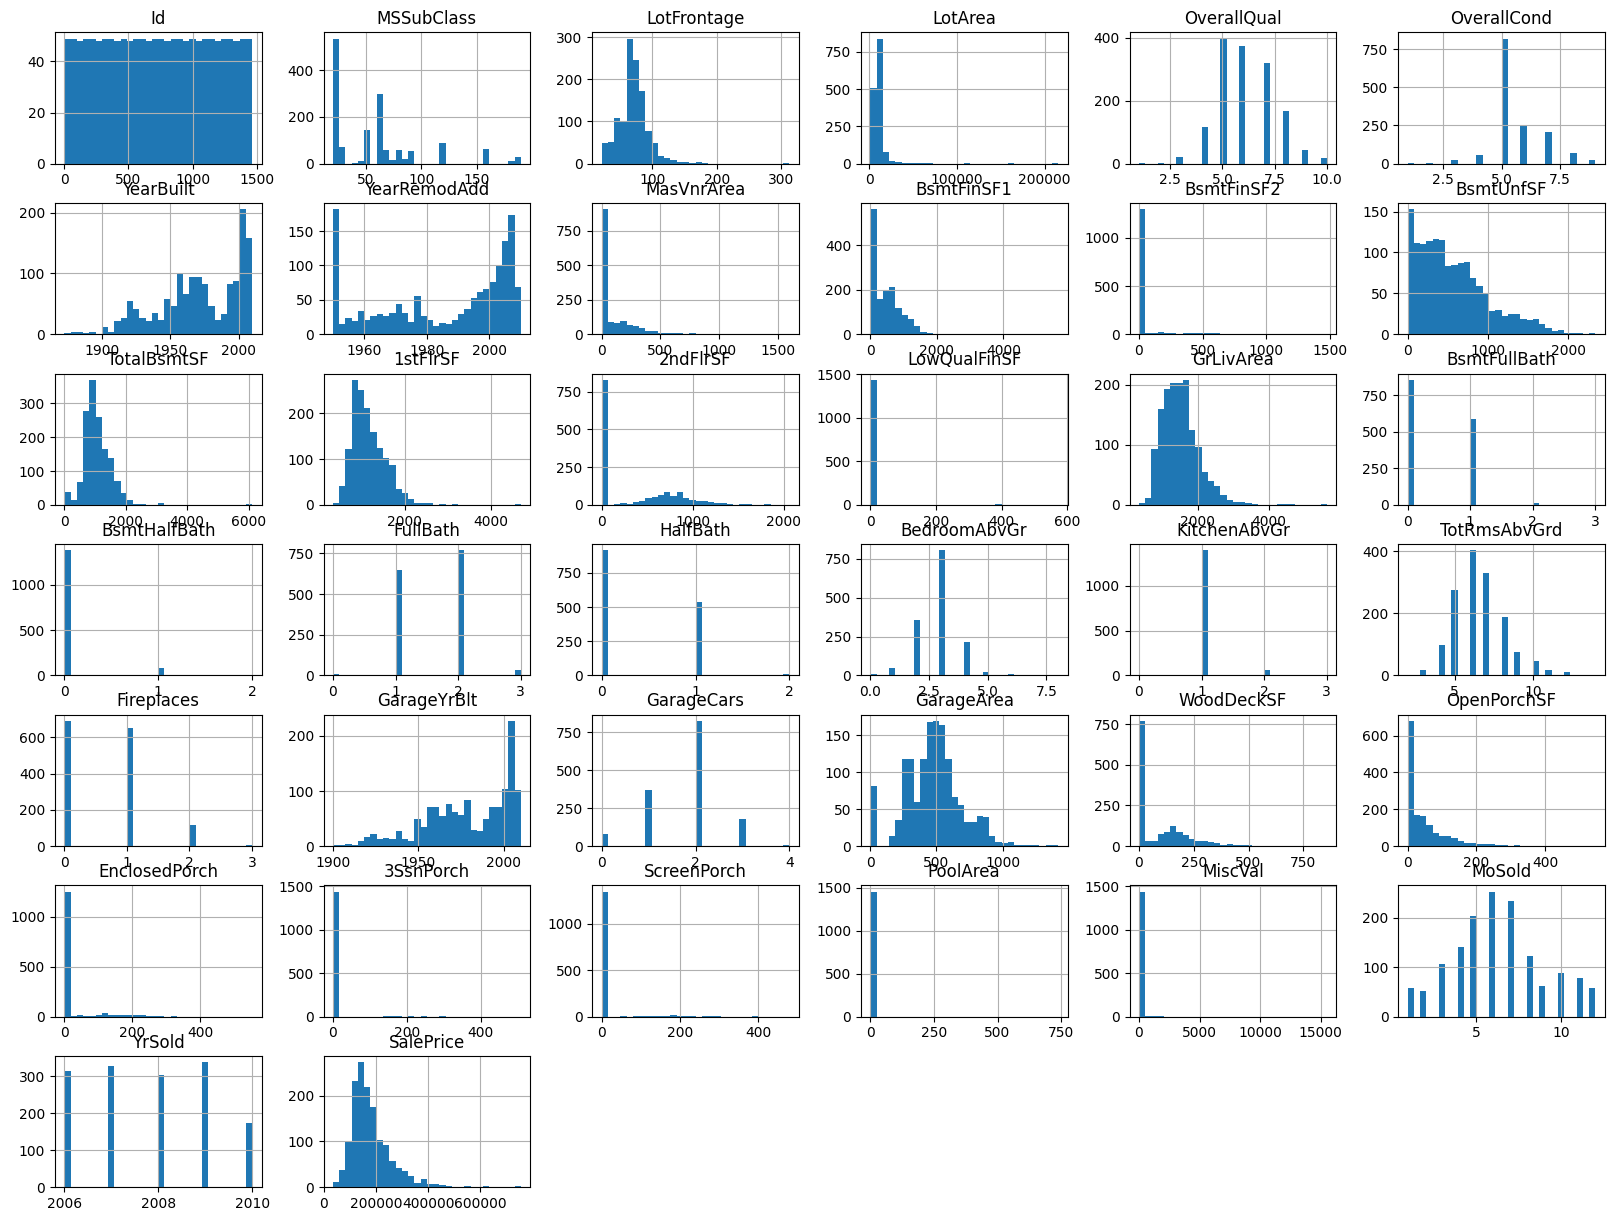

In [28]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.show()

In [70]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Plot some features VS Sale Price. Check and experement the correlation between attributes 

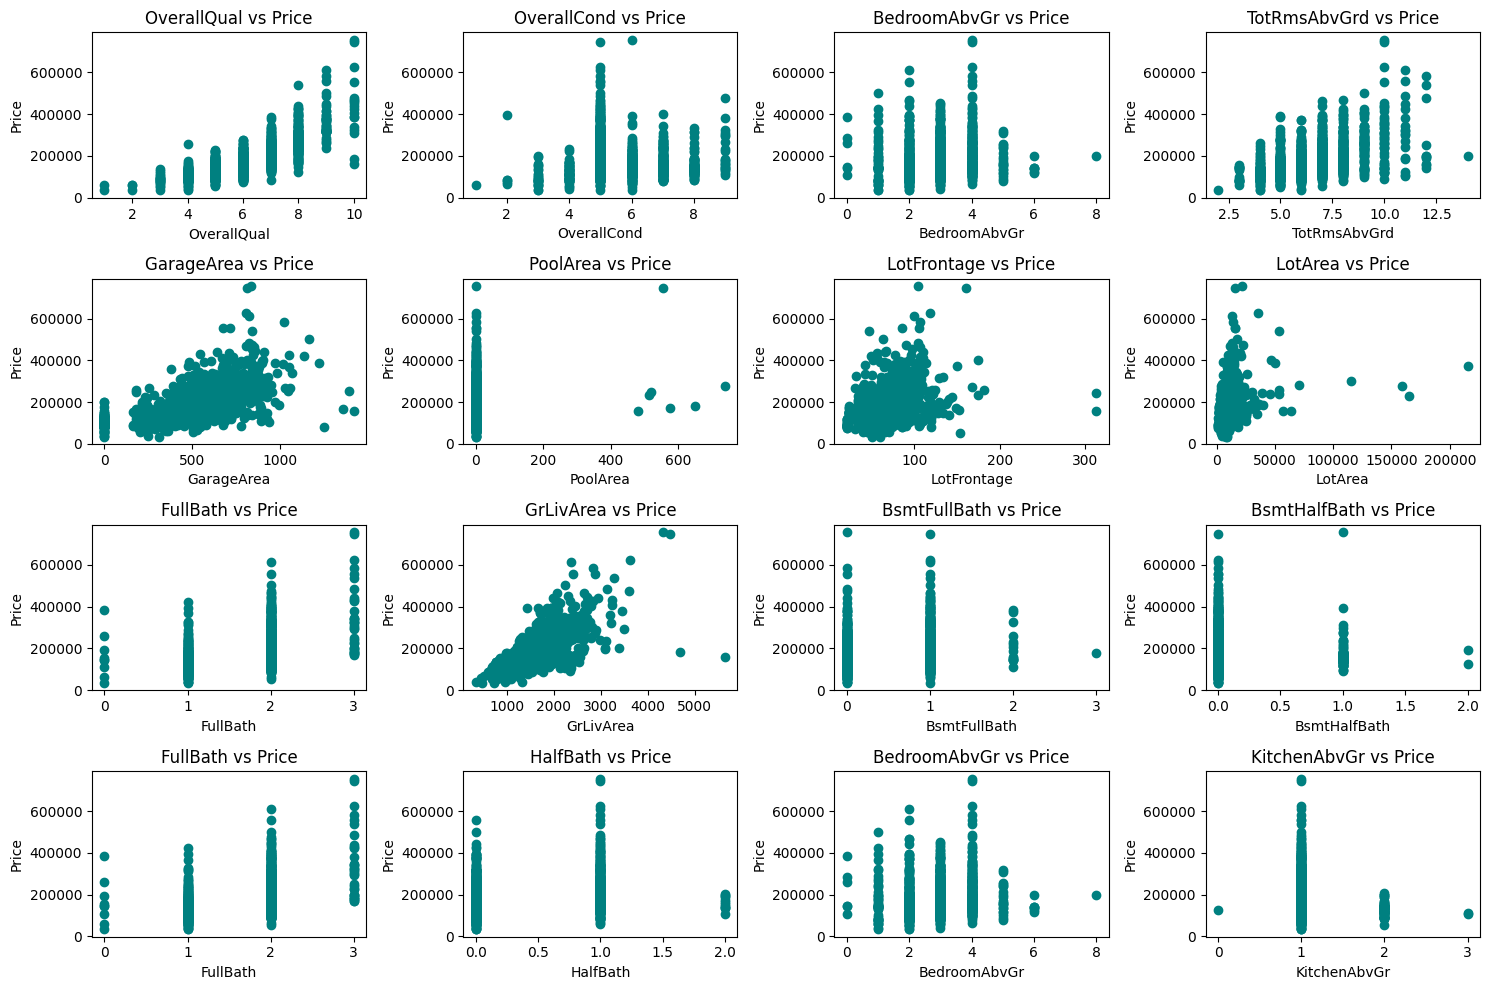

In [69]:
#sns.countplot(x='MSSubClass', data = df, palette='Set1')


# Plot slelected feature against price

features = ['OverallQual', 'OverallCond', 'BedroomAbvGr', 'TotRmsAbvGrd','GarageArea', 'PoolArea', 'LotFrontage', 'LotArea', 'FullBath',
           'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'	]

n_rows = 4
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
,
# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['SalePrice'], color='teal')
    axes[i].set_title(f'{ feature} vs Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Hide any unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### As per above visual we can frame the problem.

### It's clearly suppervised learnig task, since we are given labled training examples (each instance has expected output which is sale price). It is also typical regression task, since we have to predict value.

### For Performance measure we will selecty RMSE

## NEXT is feature selection and feature engineering. 
### From the dataset we will be selecting related features and create age feature using YearBuilt columns. Also, We convert catigorical data to numeric based on ranked/ non ranked category. We will drop remaining features. After we can start train the model


## Drop colums which has less effect. Aslo fill in missing values with mode.

In [ ]:
df.drop(columns=['X2'], inplace=True) #X2,A unique id for the loan.
df['X13'].fillna(df['X13'].mode()[0], inplace=True)



## Transform categorical(Ranked, Non-Ranked) dataset